# **CARGA DE ARCHIVO**

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/EugeDi/TelecomX2_LATAM/main/datos_tratados.csv"
datos = pd.read_csv(url)
print(datos.head())

   Churn  SeniorCitizen  tenure  PhoneService  MultipleLines InternetService  \
0      0              0       9             1              0             dsl   
1      0              0       9             1              1             dsl   
2      1              0       4             1              0     fiber optic   
3      1              1      13             1              0     fiber optic   
4      1              1       3             1              0     fiber optic   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            1            1   
1               0             0                 0            0            0   
2               0             0                 1            0            0   
3               0             1                 1            0            1   
4               0             0                 0            1            1   

   StreamingMovies        Contract  Paperles

In [2]:
datos['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

# **ANÁLISIS EXPLORATORIO**

## 1. Lectura de datos

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   int64  
 14  PaymentMethod     7032 non-null   object 
 15  Monthly           7032 non-null   float64
 16  Total             7032 non-null   float64


## 2. Clasificación de variables



*   **Variables Categóricas**:
   - Nominales:
      - Binarias: 'Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
      - Más de 2 valores: 'InternetService', 'Contract', 'PaymentMethod'
   - Ordinales: //
*   **Variables Numéricas**:
   - Discretas: 'tenure'
   - Continuas: 'Monthly', 'Total', 'Cuentas_Diarias'


## 3. Análisis de Variables Categóricas y Verificación de la Proporción de Cancelación (Churn)

In [4]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables categóricas
binarias = ['Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling']
multiclase = ['InternetService', 'Contract', 'PaymentMethod']
todas = binarias + multiclase
# Cantidad total de gráficos y cantidad de filas necesarias
n = len(todas)
filas = (n + 1) // 2
# Gráficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=todas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(todas):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = px.histogram(datos, x=var, color='Churn', barmode='group')
    for trace in hist.data:
        trace.showlegend = False
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(showticklabels=True, showgrid=False, tickvals=None, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribución de variables categóricas (según Churn)",
    showlegend=False
)
graf.show()

## 4. Análisis de Variables Numéricas

### Variables numéricas

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables numéricas
numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
# Cantidad total de gráficos y cantidad de filas necesarias
n = len(numericas)
filas = (n + 1) // 2
# Gráficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=numericas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(numericas):
    row = i // 2 + 1
    col = i % 2 + 1
    box = px.box(datos, x='Churn', y=var, color='Churn', points=False)
    for trace in box.data:
        trace.showlegend = (i == 0)  # solo la primera tiene leyenda
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(tickangle=0, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribución de variables numéricas según Churn",
    showlegend=True
)
graf.show()

# **PREPARACIÓN DE DATOS**

## 1. Separación Variables Explicativas (X) y Variable Respuesta (y)

In [6]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']

## 2. Transformación de Variables Explicativas

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
columnas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['InternetService', 'Contract', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__Contract_month-to-month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaymentMethod_bank transfer (automatic)',
       'onehotencoder__PaymentMethod_credit card (automatic)',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check',
       'remainder__SeniorCitizen', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Monthly',
       'remainder__Total', 'remainder__Cuentas_Diarias'], dtype=object)

In [8]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__Contract_month-to-month,onehotencoder__Contract_one year,onehotencoder__Contract_two year,onehotencoder__PaymentMethod_bank transfer (automatic),onehotencoder__PaymentMethod_credit card (automatic),onehotencoder__PaymentMethod_electronic check,onehotencoder__PaymentMethod_mailed check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7028,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


## 3. Transformación de Variables Respuesta (no es necesario en este caso)

In [9]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# y

## 4. Separación de datos para Entrenamiento, Validación y Prueba

In [10]:
from sklearn.model_selection import train_test_split
# PRUEBA (temp)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=5
)
# ENTRENAMIENTO (train) Y VALIDACION (val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=5
)

## 5. Balanceo de Clases (Oversampling)

In [32]:
from imblearn.over_sampling import SMOTE
# Solo en grupo de train
smote = SMOTE(random_state=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_bal).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


# **MODELO DE BASE / DUMMY**

## Generación del Modelo de Referencia (Baseline)

In [12]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7345971563981043

In [13]:
churn_porcentaje = datos['Churn'].value_counts(normalize=True) * 100
# Mostrar resultados
print("\nPorcentaje de Churn:")
print(churn_porcentaje)



Porcentaje de Churn:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


*Modelo Dummy: El porcentaje de exactitud es similar al porcentaje de Churn negativo (de clientes que siguien siendo clientes), por lo cual podemos suponer que el modelo no refleja verdadera capacidad para predecir datos, sino simplemente la dominancia de la clase 0 - "no churn".*

# **CORRELACIÓN Y SELECCIÓN DE VARIABLES**

## 1. Análisis de Correlación

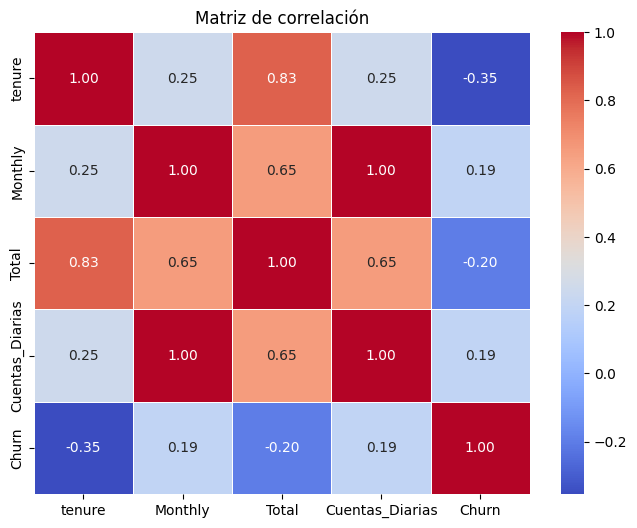

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vars = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias', 'Churn']
correlacion_df = datos[corr_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


*Podemos determinar que la correlación más significativa se da con la variable 'tenure' de forma inversamente proporcional: cuanto más tiempo estuvo el cliente, menos probable es que haya churn. Seguido por la variable 'Total', que también presenta una correlación negativa, aunque más débil. Esto sugiere que los clientes que han invertido más dinero a lo largo del tiempo tienden a permanecer en la empresa.*

## 2. Análisis Dirigido

In [15]:
import plotly.express as px

px.box(datos, x='Churn', y='tenure', color='Churn', points='outliers', width=800, height=600, title='Distribución de tenure según cancelación').show()
px.box(datos, x='Churn', y='Total', color='Churn', points='outliers', width=800, height=600, title='Distribución de Total según cancelación').show()

*Este análisis confirma la relación entre 'tenure' y 'Churn' y muestra cierto solapamiento y dispersión con respecto al 'Total' y 'Churn'.*

# **MODELADO PREDICTIVO**

## 1. Generación del Modelo de Árbol de Decisión

In [16]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
arbol.fit(X_train_bal, y_train_bal)
arbol_val  = arbol.score(X_val,  y_val)
arbol_test = arbol.score(X_test, y_test)
print(f'Árbol: {arbol_test:.4f}')


Árbol: 0.7299


*Modelo de Árbol de Decisión: Alcanzó una exactitud del 72,99%, levemente inferior al modelo Dummy. Sin embargo, al haber sido entrenado con datos balanceados, logró mejorar el recall, lo que indica una mayor capacidad para detectar clientes que hacen churn, aunque a costa de una leve caída en precisión general.*

### Gráfico del Árbol de Decisión

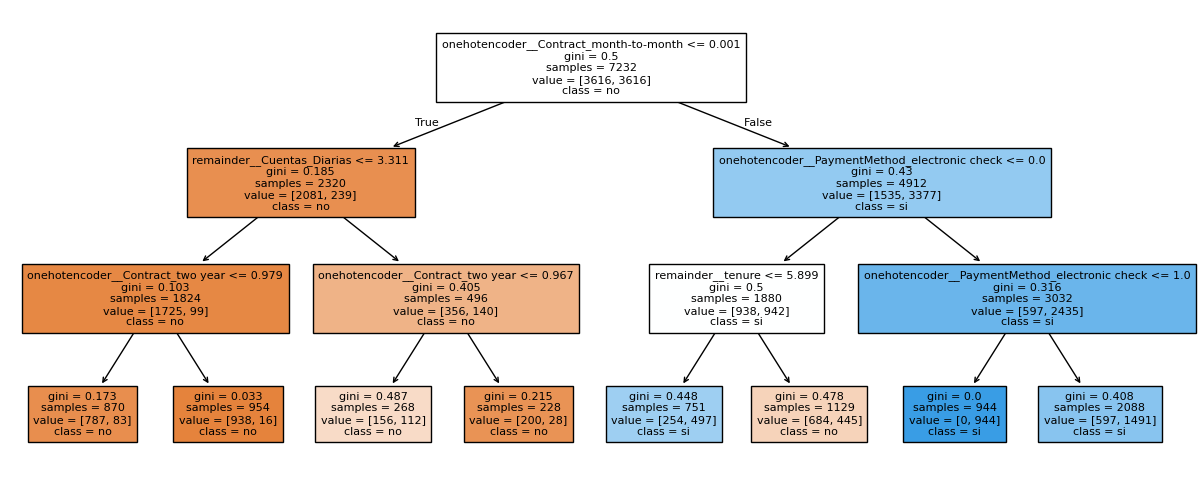

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
valores_columnas = [
    'onehotencoder__InternetService_dsl',
    'onehotencoder__InternetService_fiber optic',
    'onehotencoder__InternetService_no',
    'onehotencoder__Contract_month-to-month',
    'onehotencoder__Contract_one year',
    'onehotencoder__Contract_two year',
    'onehotencoder__PaymentMethod_bank transfer (automatic)',
    'onehotencoder__PaymentMethod_credit card (automatic)',
    'onehotencoder__PaymentMethod_electronic check',
    'onehotencoder__PaymentMethod_mailed check',
    'remainder__SeniorCitizen', 'remainder__tenure',
    'remainder__PhoneService', 'remainder__MultipleLines',
    'remainder__OnlineSecurity', 'remainder__OnlineBackup',
    'remainder__DeviceProtection', 'remainder__TechSupport',
    'remainder__StreamingTV', 'remainder__StreamingMovies',
    'remainder__PaperlessBilling', 'remainder__Monthly',
    'remainder__Total', 'remainder__Cuentas_Diarias'
]
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'si'], fontsize = 8, feature_names = valores_columnas);

*Si bien el análisis de la matriz de correlación arrojaba una correlación significativa entre el 'tenure' y el 'Churn', mediante la graficación del modelo de árbol de decisión, podemos observar que según este último modelo el nodo raíz correspondería al **tipo de contrato - mes a mes**. Dicha variable se podría explicar ya que los contratos mes a mes son más volátiles y podrían impactar en la no fidelización del cliente.*

## 2. Normalización de datos

*El modelo KNN, al basarse en calcular distancias entre observaciones, es sensible a las magnitudes numéricas. De esta forma, si no normalizáramos los datos - en este caso con MinMaxScaler -, las variables que tienen rangos más amplios tendrían más significatividad para el modelo que otras con menor rango.*

In [18]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_bal)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

## 3. Generación del Modelo KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train_bal)
knn_val  = knn.score(X_val_norm,  y_val)
knn_test = knn.score(X_test_norm, y_test)
print(f'KNN: {knn_test:.4f}')


KNN: 0.7175


*Modelo KNN: Obtuvo una exactitud del 71,75%, inferior al Dummy (desbalanceado); y ligeramente menor al observado en el modelo de árbol de decisiones (balanceado).*

## 4. Evaluación de Modelos

### 1) Cálculo de exactitud de cada modelo:

In [20]:
print(f'Exactitud Dummy: Test: {(dummy.score(X_test, y_test)):.4f}')
print(f'Exactitud Árbol: Validación: {arbol_val:.4f} | Test: {arbol_test:.4f}')
print(f'Exactitud KNN: Validación: {knn_val:.4f} | Test: {knn_test:.4f}')

Exactitud Dummy: Test: 0.7346
Exactitud Árbol: Validación: 0.7357 | Test: 0.7299
Exactitud KNN: Validación: 0.7386 | Test: 0.7175


### 2) Matrices de confusión de cada modelo:

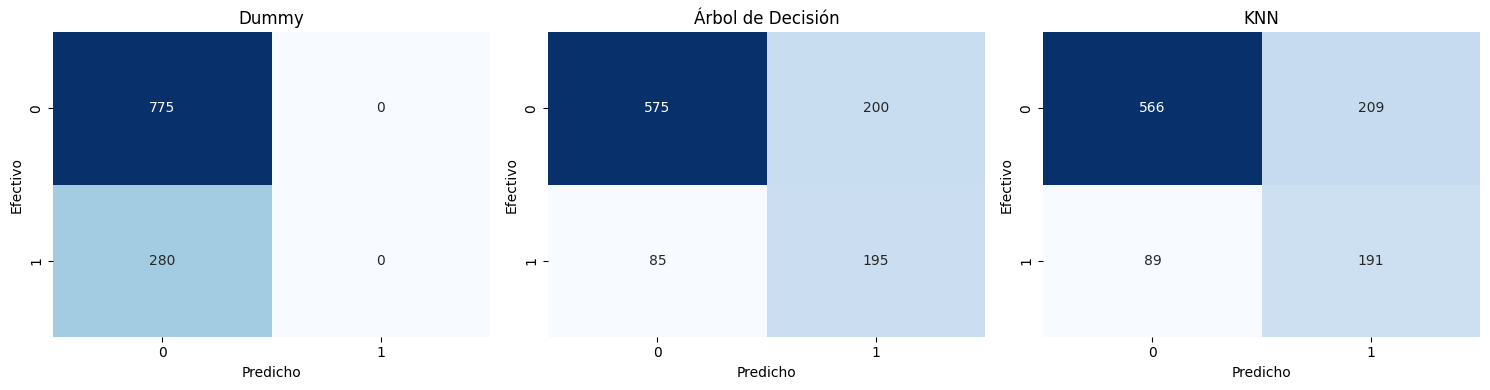

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
modelos = {
    "Dummy": dummy,
    "Árbol de Decisión": arbol,
    "KNN": knn
}
X_tests = {
    "Dummy": X_test,
    "Árbol de Decisión": X_test,
    "KNN": X_test_norm
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_tests[nombre])
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(nombre)
    axes[i].set_xlabel('Predicho')
    axes[i].set_ylabel('Efectivo')
plt.tight_layout()
plt.show()

*Con el gráfico de **MATRIZ DE CONFUSIÓN** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Predijo todos los casos como clase 0 ("no churn"), por lo tanto falló el 100% de los casos reales de churn.*
* **El modelo Árbol**: *Logró predecir correctamente el 69,64% de los casos de churn, lo cual refleja una capacidad moderada de aprendizaje para la clase minoritaria. Sin embargo, perdió precisión en la clase mayoritaria para poder captar parte del churn.*
* **El modelo KNN**: *Detectó el 68,21% de los casos de churn. Si bien su desempeño fue similar al del árbol, cometió ligeramente más errores y predijo igualmente más churn donde no lo había, lo que puede afectar su precisión global.*

### 3) Presición de cada modelo:

In [22]:
from sklearn.metrics import precision_score
print("Precisión Dummy:", precision_score(y_test, dummy.predict(X_test), zero_division=0))
print("Precisión Árbol:", precision_score(y_test, arbol.predict(X_test), zero_division=0))
print("Precisión KNN:", precision_score(y_test, knn.predict(X_test_norm), zero_division=0))

Precisión Dummy: 0.0
Precisión Árbol: 0.4936708860759494
Precisión KNN: 0.4775


*Con el cálculo de **PRECISIÓN** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Sólo se guió por el valor más frecuente de churn ('0'), por lo cual su precisión fue nula.*
* **El modelo Árbol**: *Demostró una precisión del 49,36%, lo que indica que aproximadamente la mitad de las veces que predijo churn, acertó. Este valor es razonable en contextos con clases balanceadas artificialmente, pero aún deja margen de mejora en cuanto a falsos positivos.*
* **El modelo KNN**: *Demostró una precisión del 47,75%, muy cercana al modelo del árbol. Su rendimiento es ligeramente inferior, y su tasa de falsos positivos es apenas mayor, lo que impacta su precisión general.*

### 4) Recall de cada modelo:

In [23]:
from sklearn.metrics import recall_score
print("Recall Dummy:", recall_score(y_test, dummy.predict(X_test)))
print("Recall Árbol:", recall_score(y_test, arbol.predict(X_test)))
print("Recall KNN:", recall_score(y_test, knn.predict(X_test_norm)))

Recall Dummy: 0.0
Recall Árbol: 0.6964285714285714
Recall KNN: 0.6821428571428572


*Con el cálculo de **RECALL** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Confirma la nulidad de su precisión, no logrando identificar ningún caso real de cancelación.*
* **El modelo Árbol**: *Obtuvo un recall del 69,64% indicando una buena capacidad para identificar clientes que efectivamente hicieron churn.*
* **El modelo KNN**: *Obtuvo un recall del 68,21%, apenas por debajo del modelo de árbol.*

### 5) F1-Score de cada modelo:

In [24]:
from sklearn.metrics import f1_score
print("F1-score Dummy:", f1_score(y_test, dummy.predict(X_test), zero_division=0))
print("F1-score Árbol:", f1_score(y_test, arbol.predict(X_test), zero_division=0))
print("F1-score KNN:", f1_score(y_test, knn.predict(X_test_norm), zero_division=0))

F1-score Dummy: 0.0
F1-score Árbol: 0.5777777777777777
F1-score KNN: 0.5617647058823529


*Con el cálculo de **F1-SCORE** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Continúa arrojando nulo, de forma esperable para su underfitting.*
* **El modelo Árbol**: *Arrojó un valor de 0.5777, lo que refleja un equilibrio moderado entre precisión y recall.*
* **El modelo KNN**: *Arrojó un valor de 0.5617, apenas por debajo del modelo de árbol.*

### 6) AUC-ROC de cada modelo:

*En el contexto de la pérdida de clientes (Churn), es crucial identificar correctamente a los clientes que tienen una alta probabilidad de abandonar la empresa. Minimizar los falsos negativos (es decir, no identificar a un cliente que realmente se va a ir) es fundamental para tomar medidas preventivas y retener a esos clientes.*

In [25]:
from sklearn.metrics import roc_auc_score
y_pred_dummy = dummy.predict_proba(X_test)[:, 1]
auc_dummy = roc_auc_score(y_test, y_pred_dummy)
print(f'AUC-ROC Dummy: {auc_dummy:.4f}')
y_pred_arbol = arbol.predict_proba(X_test)[:, 1]
auc_arbol = roc_auc_score(y_test, y_pred_arbol)
print(f'AUC-ROC Árbol: {auc_arbol:.4f}')
y_pred_knn = knn.predict_proba(X_test_norm)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f'AUC-ROC KNN: {auc_knn:.4f}')

AUC-ROC Dummy: 0.5000
AUC-ROC Árbol: 0.7746
AUC-ROC KNN: 0.7586


*Con el cálculo de **AUC-ROC** de cada modelo podemos observar que:*

* **El modelo Dummy**: *De forma esperable, arrojó un valor de 0.50, equivalente a un clasificador aleatorio, sin capacidad para discriminar entre 'Churn' positivo o negativo.*
* **El modelo Árbol**: *Obtuvo un AUC-ROC de 0.7746, lo que indica una buena capacidad de discriminación global. Este resultado sugiere que el modelo puede diferenciar con criterio entre clientes que abandonan y los que permanecen.*
* **El modelo KNN**: *Obtuvo un AUC-ROC de 0.7586, apenas por debajo del árbol*

### 7) INFORME DE MÉTRICAS de cada modelo:

In [26]:
from sklearn.metrics import classification_report
print("Reporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test, arbol.predict(X_test)))
print("Reporte de Clasificación para KNN:")
print(classification_report(y_test, knn.predict(X_test_norm)))
print("Reporte de Clasificación para Dummy:")
print(classification_report(y_test, dummy.predict(X_test), zero_division=0))

Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       775
           1       0.49      0.70      0.58       280

    accuracy                           0.73      1055
   macro avg       0.68      0.72      0.69      1055
weighted avg       0.77      0.73      0.74      1055

Reporte de Clasificación para KNN:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       775
           1       0.48      0.68      0.56       280

    accuracy                           0.72      1055
   macro avg       0.67      0.71      0.68      1055
weighted avg       0.76      0.72      0.73      1055

Reporte de Clasificación para Dummy:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       775
           1       0.00      0.00      0.00       280

    accuracy                           0.73      1055
   macr

### 8) Exportación de archivos binarios:

In [27]:
import pickle
with open('datos_transformados.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(knn, archivo)

# **INTERPRETACIÓN Y CONCLUSIONES**

## 1. Análisis de la Importancia de las Variables

### 1) **Regresión Logística**

In [28]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_norm, y_train_bal)
coeficientes = pd.Series(log_reg.coef_[0], index=one_hot.get_feature_names_out())
coeficientes.sort_values(key=np.abs, ascending=False).head(10)

,0
remainder__tenure,-3.573563
remainder__Total,2.446363
onehotencoder__Contract_month-to-month,0.906864
onehotencoder__Contract_two year,-0.754555
onehotencoder__InternetService_fiber optic,0.737240
onehotencoder__InternetService_no,-0.733441
remainder__PhoneService,-0.671415
remainder__TechSupport,-0.515777
remainder__OnlineSecurity,-0.513797
remainder__SeniorCitizen,0.369610


*Con la **REGRESIÓN LOGÍSTICA** podemos determinar que las variables más significativas son:*
* **tenure**: *cuanto más tiempo estuvo el cliente, menos probable es que haya churn.*
* **Total**: *cuanto mayor es el monto total facturado, mayor es la probabilidad de cancelación.*

*Este análisis de regresión logística corrige la multicolinealidad que había arrojado previamente el análisis de la matriz de correlación, demostrando que, una vez controladas las demás variables, a mayor total facturado, aumenta la probabilidad de churn.*

### 2) **Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train_bal, y_train_bal)
importancia_rf = pd.Series(rf.feature_importances_, index=one_hot.get_feature_names_out())
importancia_rf.sort_values(ascending=False).head(10)

,0
remainder__Total,0.117580
remainder__tenure,0.109172
onehotencoder__Contract_month-to-month,0.103867
remainder__Monthly,0.094578
onehotencoder__PaymentMethod_electronic check,0.081324
remainder__Cuentas_Diarias,0.079157
onehotencoder__Contract_two year,0.050029
remainder__PaperlessBilling,0.044107
remainder__OnlineSecurity,0.043128
remainder__TechSupport,0.038454


*Con el **RANDOM FOREST** podemos determinar que las variables más significativas son:*
* **Total**: *el monto total pagado es clave en la decisión de churn, coherente con lo visto en regresión logística.*
* **tenure**: *el tiempo de permanencia vuelve a ser una de las variables más relevantes, lo que refuerza su valor predictivo.*
* **month-to-month**: *los contratos mes a mes se sitúan como tercera variable de relevancia para el churn.*

### 3) **Support Vector Machine**

In [30]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=5000)
svm.fit(X_train_norm, y_train_bal)
coef_svm = pd.Series(svm.coef_[0], index=one_hot.get_feature_names_out())
coef_svm.sort_values(key=np.abs, ascending=False).head(10)

,0
remainder__tenure,-1.324418
remainder__Total,0.891201
remainder__Monthly,-0.864078
onehotencoder__InternetService_fiber optic,0.690803
onehotencoder__InternetService_no,-0.658469
remainder__Cuentas_Diarias,-0.629626
onehotencoder__Contract_month-to-month,0.346944
remainder__StreamingMovies,0.239663
remainder__StreamingTV,0.207554
onehotencoder__Contract_two year,-0.191506


*Con el **SVM** podemos determinar que las variables más significativas son:*
* **tenure**: *confirma que a mayor tiempo como cliente, menor probabilidad de baja.*
* **Total** y **Monthly**: *un mayor gasto total y mensual se asocia con menor churn.*
* **InternetService_fiber optic**: *quienes tienen fibra óptica presentan más riesgo de cancelación.*

## 2. Conclusiones

Luego de aplicar distintos modelos de aprendizaje supervisado para predecir la cancelación de clientes (churn), podemos concluir lo siguiente:

### **Factores determinantes en la cancelación**

El análisis combinado de regresión logística, Random Forest y SVM reveló variables claves asociadas al churn:

* **Tenure** (tiempo como cliente): En todos los modelos, el tiempo de permanencia demostró tener una relación inversa con la cancelación. Cuanto mayor es el tiempo que el cliente lleva con la empresa, menor es la probabilidad de que se dé de baja. Esta variable se posicionó como **la más robusta y consistente en el análisis**.

* **Total facturado**: Esta variable apareció como significativa tanto en regresión logística como en Random Forest y SVM. La regresión sugiere que a **mayor monto total abonado, mayor riesgo de churn**, posiblemente por acumulación de costos o insatisfacción prolongada. En cambio, modelos como el árbol de decisión, Random Forest y SVM no evalúan la dirección del efecto sino su utilidad para clasificar correctamente los casos: en los tres, Total resultó una de las variables que más contribuyeron a distinguir entre clientes que se quedan y los que se dan de baja.

* **Tipo de contrato**: En especial los **contratos "mes a mes" aumentan significativamente el riesgo de cancelación**. Esto se evidenció tanto en el árbol de decisión (que usó esta variable como nodo raíz), como en los coeficientes de regresión y en la importancia en el Random Forest.

* **Servicio de Fibra Óptica**: **se asoció con mayor probabilidad de cancelación**. Esto podría estar indicando expectativas de servicio de internet más altas a las cumplidas o fallas en el mismo.

### **Recomendaciones para retención de clientes**

A partir de los resultados, pueden delinearse estrategias de retención centradas en variables clave:

* **Fidelización temprana**: Diseñar estrategias para retener a los clientes en sus primeros meses, ya que el riesgo de churn disminuye significativamente con el tiempo.

* **Revisar el esquema mes-a-mes**: Incentivar la migración a contratos más largos podría reducir la volatilidad del cliente.

* **Monitorear la satisfacción con respecto al servicio de internet por fibra óptica**: A fin de mejorar la percepción del cliente sobre dicho servicio.